INTRODUCTION
In today's digital economy, credit cards have become an essential tool for convenient and cashless transactions. However, the increasing volume of online and in-person credit card transactions has also heightened the risk of fraudulent activities. Credit card fraud involves unauthorized use of an individual's card information to make purchases or withdraw funds. These fraudulent transactions can result in significant financial losses for both consumers and financial institutions.

Fraud detection systems are designed to identify suspicious or unauthorized activities in real-time or after transactions occur. Modern fraud detection methods leverage a combination of techniques, including rule-based systems, machine learning algorithms, and data analytics to assess transaction patterns and flag anomalies. These systems evaluate parameters such as transaction amount, location, frequency, and user behavior to distinguish between legitimate and fraudulent transactions.

As fraudsters continue to develop sophisticated methods, it is crucial for financial institutions to adopt advanced detection mechanisms that balance security with user experience. Effective fraud detection not only protects consumers and financial institutions but also builds trust in the digital payment ecosystem.


TECHNOLOGY AND TOOLS
Fraud detection in credit card transactions involves identifying fraudulent activities based on transaction data. Since fraudulent transactions are rare (imbalanced datasets), detecting them is a challenging binary classification problem (fraud vs. legitimate).



KEY STEP IN THE PROCESS
Here’s how machine learning + Logistic Regression works for credit card fraud detection:
🔹 Step 1: Data Collection

    Use datasets like Kaggle’s Credit Card Fraud Detection dataset, containing transaction features and labels (fraud or not fraud).

🔹 Step 2: Data Preprocessing

    Handle missing values if any.

    Feature scaling (e.g., StandardScaler) since Logistic Regression is sensitive to feature scales.

    Encode categorical variables if needed.

    Handle data imbalance:

        Use under-sampling (reduce legitimate samples) or

        Over-sampling (SMOTE) to balance the classes.

🔹 Step 3: Model Building

    Import LogisticRegression from sklearn.linear_model.

    Train the model on the preprocessed data:
    Here’s how machine learning + Logistic Regression works for credit card fraud detection:
🔹 Step 1: Data Collection

    Use datasets like Kaggle’s Credit Card Fraud Detection dataset, containing transaction features and labels (fraud or not fraud).

🔹 Step 2: Data Preprocessing

    Handle missing values if any.

    Feature scaling (e.g., StandardScaler) since Logistic Regression is sensitive to feature scales.

    Encode categorical variables if needed.

    Handle data imbalance:

        Use under-sampling (reduce legitimate samples) or

        Over-sampling (SMOTE) to balance the classes.

🔹 Step 3: Model Building

    Import LogisticRegression from sklearn.linear_model.

    Train the model on the preprocessed data:
    
 Step 5: Interpretation

    Logistic Regression outputs a probability (0 to 1) that a transaction is fraudulent.

    A threshold (default 0.5) is used to classify transactions:

        If probability > threshold → classify as fraud

        Otherwise → legitimate

    Adjust the threshold if needed (to reduce false negatives).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [3]:
df=pd.read_csv('/home/bantyraj/Downloads/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#check the data
print(df.info())
print(df.head())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#prepare the data
x = df.drop('Class',axis=1)
y = df['Class']

In [6]:
#scaler the feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)



In [7]:
#splitting the dataset into training and testing
x_train , x_test ,y_train , y_test = train_test_split(x_scaled ,y,test_size=0.3, random_state=42,stratify=y)

In [8]:
#train a logisticregression model
model=LogisticRegression(max_iter=1000)
model.fit(x_train ,y_train)

LogisticRegression(max_iter=1000)

In [9]:
#make prediction
y_pred = model.predict(x_test)
x_pred = model.predict(x_test)

In [10]:
#evaluate the model
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")


confusion matrix:
[[85279    16]
 [   59    89]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9991222218320986
ROC AUC Score: 0.8005818835424908


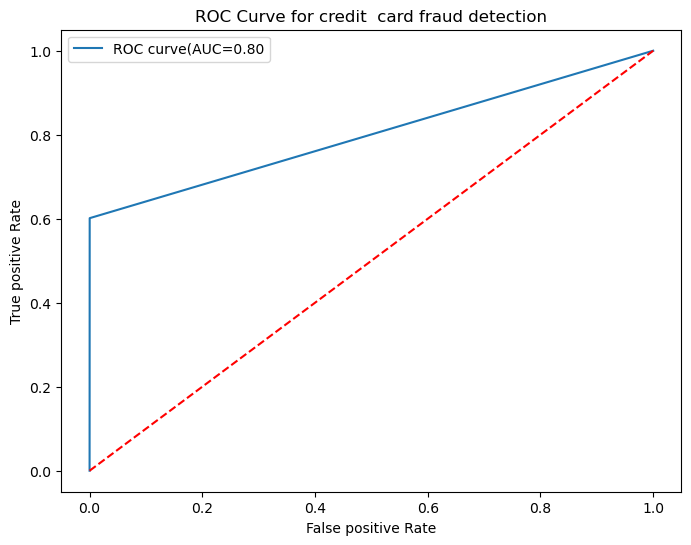

In [11]:
#plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr , tpr ,label= 'ROC curve(AUC={:,.2f}'.format(roc_auc_score(y_test,y_pred)))
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC Curve for credit  card fraud detection')
plt.legend()
plt.show()